In [70]:
from nbodykit.lab import LinearMesh, cosmology, FFTPower
from matplotlib import pyplot as plt
import numpy as np
import scipy.ndimage as scpimg
import nbodykit



%matplotlib inline

In [49]:
cosmo = cosmology.Planck15
Plin = cosmology.LinearPower(cosmo, redshift=0, transfer='EisensteinHu')

In [76]:
mesh = LinearMesh(Plin, Nmesh=256, BoxSize=256*5, seed=42)
density = mesh.paint(mode='real')
sigma_smooth=1.0
density_smooth = scpimg.filters.gaussian_filter(density,sigma_smooth)
mesh_smooth = nbodykit.source.mesh.array.ArrayMesh(density_smooth, 256*4) 

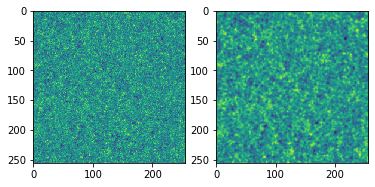

In [77]:
plt.subplot(1,2,1)
plt.imshow(density[:,:,0])
plt.subplot(1,2,2)
plt.imshow(density_smooth[:,:,0])

1.0000007 1.0000004


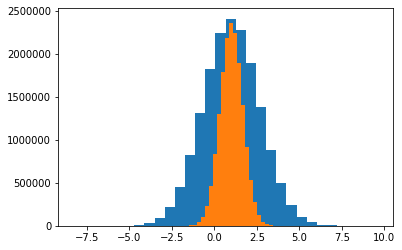

In [78]:
plt.hist(density[:,:,:].flatten(), bins=30)
plt.hist(density_smooth[:,:,:].flatten(), bins=30)

print(np.mean(density), np.mean(density_smooth))


In [79]:
r = FFTPower(mesh, mode='1d', dk=0.005, kmin=0.01)
Pk = r.power
r = FFTPower(mesh_smooth, mode='1d', dk=0.005, kmin=0.01)
Pk_smooth = r.power

(0.01, 1)

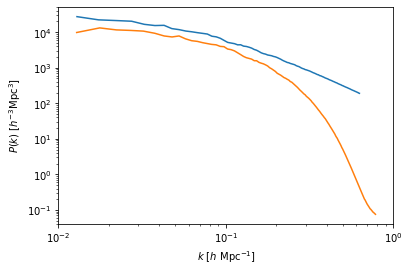

In [80]:
plt.loglog(Pk['k'], Pk['power'].real - Pk.attrs['shotnoise'])
plt.loglog(Pk_smooth['k'], Pk_smooth['power'].real - Pk_smooth.attrs['shotnoise'])

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")
plt.xlim(0.01, 1)

In [43]:
def filter(k, v):
    kk = sum(ki ** 2 for ki in k) # k^2 on the mesh
    kk[kk == 0] = 1
    return v / kk # divide the mesh by k^2
filtered_mesh = mesh.apply(filter, mode='complex', kind='wavenumber')
filtered_density = filtered_mesh.paint(mode='real')


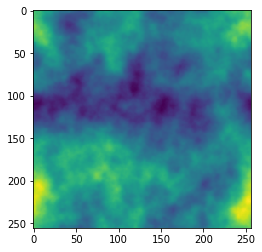

In [44]:
plt.imshow(filtered_density[:,:,1])

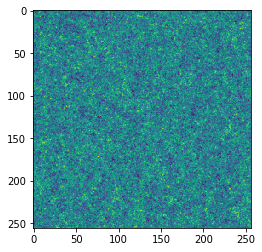

In [45]:
plt.imshow(density[:,:,1])

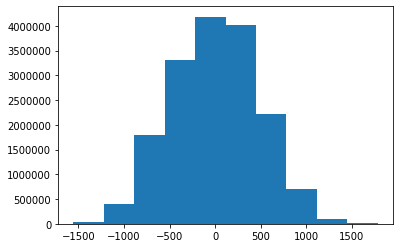

In [46]:
_ = plt.hist(filtered_density[...].flatten())